In [1]:
import pandas as pd
import numpy as np
from scipy import optimize



In [2]:
cmf_rateslib_root = '../../'
import sys
if cmf_rateslib_root not in sys.path:
    sys.path.append(cmf_rateslib_root)

Для демонстрации работы создадим две кривые. По одной будем считать PV, по другой cashflow - сколько мы заработаем, если ставка изменится

In [3]:
from cmf_rateslib.curves.base_curve import BaseZeroCurve
from cmf_rateslib.curves.zero_curve import ZeroCurve

In [4]:
from cmf_rateslib.products.ir_futures import IR_Futures

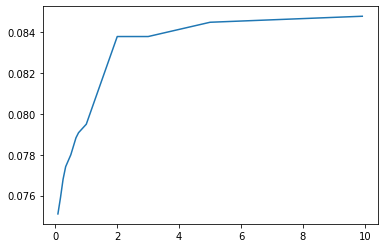

In [69]:
curve2 = ZeroCurve([0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 3, 5, 10], [0.0751, 0.0763, 0.0773, 0.078, 0.0790, 0.0795, 0.0838, 0.0838, 0.0845, 0.0848])
curve2.lin_interpolate('zero_rates')
curve2.plot()

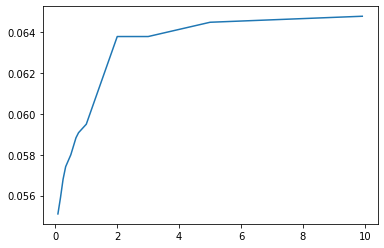

In [70]:
curve2 = ZeroCurve(curve2.bump(-0.02)._maturities, curve2.bump(-0.02)._rates)
curve2.plot()

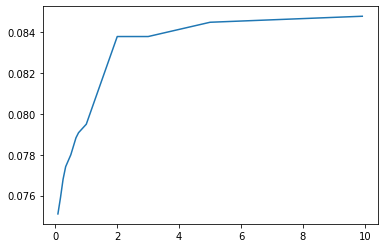

In [71]:
curve = ZeroCurve([0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 3, 5, 10], [0.0751, 0.0763, 0.0773, 0.078, 0.0790, 0.0795, 0.0838, 0.0838, 0.0845, 0.0848])
curve.lin_interpolate('zero_rates')
curve.plot()

Создаем объект Interes Rate Future.
Параметры - дата экспирации, тенор и размер контракта

In [72]:
ed = IR_Futures(9/12, 'Q', 1000000)

Считаем PV: на вход может подаваться как кривая так и просто значение ставки. Если подаем ставку, надо указать с параметр rate. Для простоты конвертиуем до четвертого знака после запятой (если не в процентах)

In [73]:
ed.pv(rate = 0.0009)

99.91

In [87]:
ed.pv(curve2)

93.96

Выводим cashflow на каждый момент времени и строим график. По факту показывает, сколько мы заплатили за контракт и сколько получили выплат от продавца при изменении ставки или сколько нам придется заплатит

In [93]:
ed.get_cashflows(curve, asof = 0)

[-93.96,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

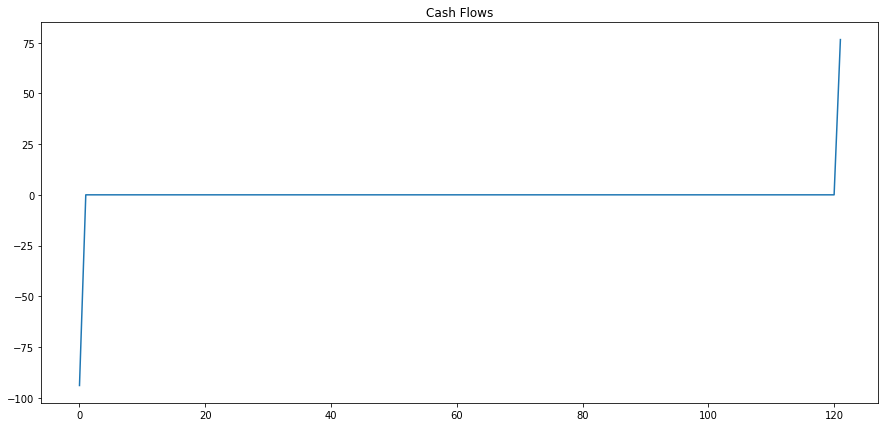

In [94]:
ed.cashflows_plot(curve, asof = 0.5, trade_date = 10/12)

Считаем DV01, Duration и Convexity. Расчет convexity неочевиден, требует моделирования с использованием заданных волатильности и среднего. Хотя показатель duration не имеет смысла, если мы работаем с quotes prices

In [90]:
ed.dv01()

25.0

In [91]:
ed.duration()

-1.0000000000005116

In [92]:
ed.convexity(0.5, 0.01, 0.2)

2.3343980660027438e-11